# Exploration 11. CIFAR-10 Image Generation
---
# (프로젝트) CIFAR-10 이미지 생성하기

## [루브릭]
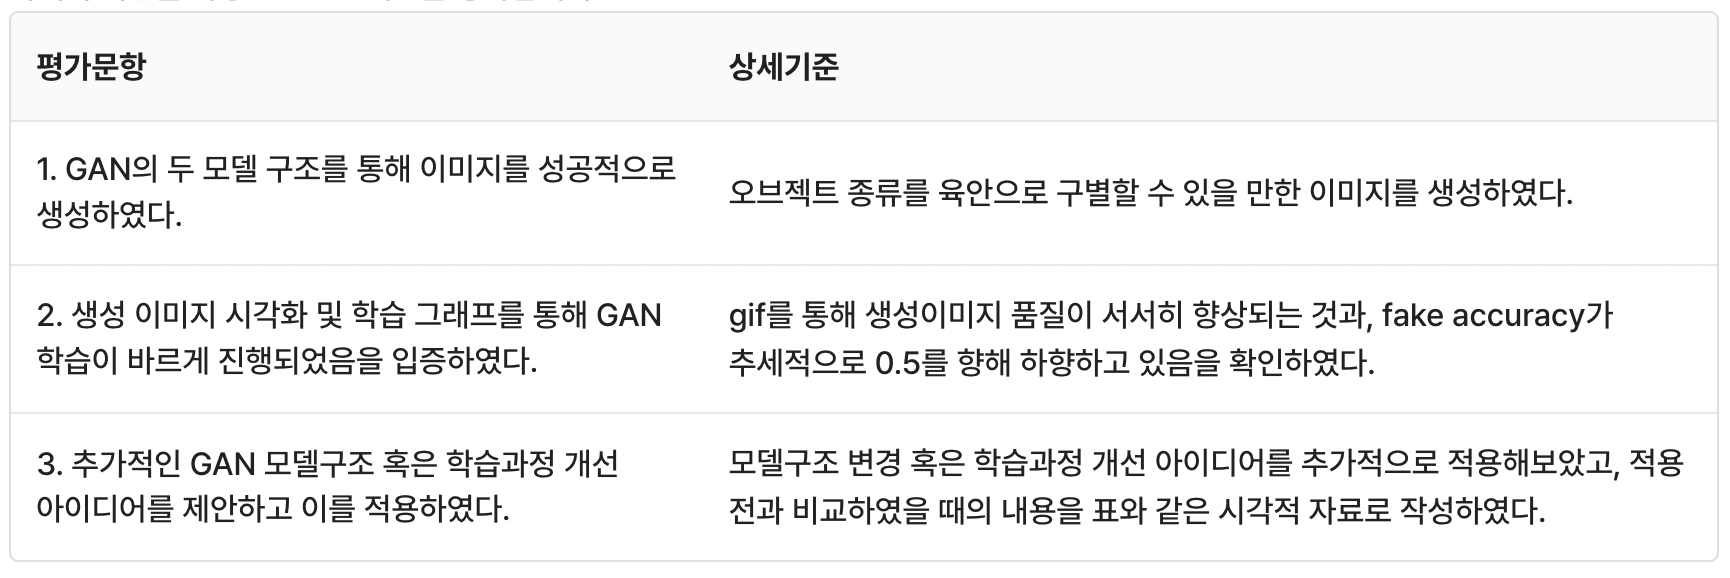

## STEP 1. 데이터셋 구성하기

In [8]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

import warnings
warnings.filterwarnings(action='ignore') 

In [9]:
cifar10 = tf.keras.datasets.cifar10

(train_x, train_y), (test_x, test_y) = cifar10.load_data()

train_x.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [10]:
print("max pixel : ", train_x.max())
print("min pixel : ", train_x.min())

max pixel :  255
min pixel :  0


In [11]:
train_x = (train_x - 127.5) / 127.5

In [12]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [13]:
train_x.shape

(50000, 32, 32, 3)

In [14]:
train_x[0].shape

(32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


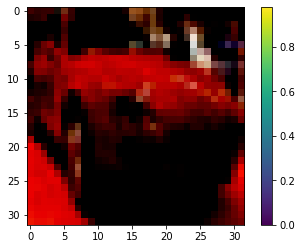

In [15]:
plt.imshow(train_x[5])
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

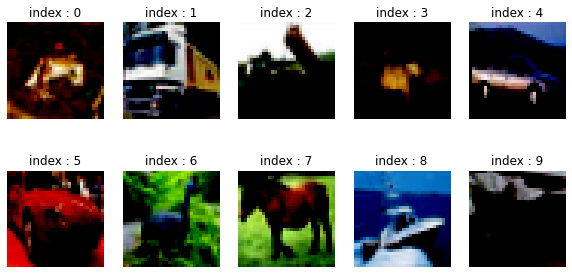

In [16]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i])
    plt.title(f"index : {i}")
    plt.axis('off')
plt.show()

In [17]:
BUFFER_SIZE = 50000
BATCH_SIZE = 256

In [18]:
type(train_x)

numpy.ndarray

In [19]:
train_x.shape

(50000, 32, 32, 3)

In [20]:
# make a dataset from a numpy array
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [21]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

## STEP 2. 생성자 모델 구현하기

In [22]:
def make_generator_model():
    
    # Start
    model = tf.keras.Sequential()
    
    # First : Dense Layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,))) # input_shape 형태 규정 방법 확인
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # Second : Reshape Layer
    model.add(layers.Reshape((8, 8, 256)))
    
    # Third : Conv2DTranspose Layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # Fourth : Conv2DTranspose Layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(3,3), strides=(2,2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # Fifth : Conv2DTranspose Layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(3,3), strides=(2, 2), padding='same', use_bias=False \
                                    , activation='tanh'))
    return model

In [23]:
generator = make_generator_model()

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             1638400   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16384)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         294912    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 128)         0

In [24]:
noise = tf.random.normal([1, 100])

In [25]:
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-0.13982403,  1.010545  , -0.19108295,  0.35492855, -0.03733011,
         0.54190356, -0.64319104,  0.40288565, -1.2973163 ,  0.11191984,
         0.53744847,  2.2645757 ,  1.2252033 , -0.95499504, -2.8865333 ,
         0.9212799 , -0.1989491 ,  0.77576333,  0.47991973, -0.25187638,
         0.67008334, -0.86011904,  0.58196473,  1.3604679 , -1.0161316 ,
         0.87749445,  0.38033086,  0.13017598,  0.5939606 , -0.3110558 ,
         0.64421   ,  0.09003815, -0.31438193, -1.1778845 , -0.6216263 ,
         0.78547925, -0.01404028, -1.0295514 ,  0.5543597 ,  0.20014974,
        -0.78754103, -0.12312377, -0.40070418, -0.208592  ,  0.41533634,
         1.1637874 ,  1.1770301 , -0.37081903,  0.20982657,  0.18280455,
         0.41697344, -0.04599141,  1.0833671 ,  0.4221582 ,  1.8027483 ,
        -0.79167956,  1.3408138 , -0.8160424 ,  0.7976268 ,  0.8458664 ,
        -0.42704886,  1.123206  ,  0.37480247,  1.5443978 , -0.2271461 ,
 

In [26]:
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 32, 32, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


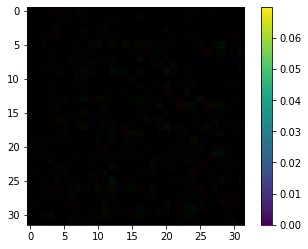

In [27]:
plt.imshow(generated_image[0]) # 배열 index 의미 확인 필요
plt.colorbar()
plt.show()

## STEP 3. 판별자 모델 구현하기

In [28]:
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(3))

    return model

In [29]:
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        1792      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

In [30]:
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.00207848, -0.00732595,  0.00406256]], dtype=float32)>

In [31]:
type(generated_image)

tensorflow.python.framework.ops.EagerTensor

In [32]:
generated_image.shape

TensorShape([1, 32, 32, 3])

In [33]:
type(train_x[0])

numpy.ndarray

In [34]:
train_x[0].shape

(32, 32, 3)

In [35]:
train_new = train_x[0][np.newaxis, :, : , :]

In [36]:
train_new.shape

(1, 32, 32, 3)

In [37]:
real_img = tf.convert_to_tensor(train_new)

In [38]:
decision = discriminator(real_img, training=False)
decision

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.0296305 ,  0.07805908,  0.0045973 ]], dtype=float32)>

## STEP 4. 손실함수와 최적화 함수 구현하기

In [39]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [40]:
# cross_entropy 내용 확인
# BinaryCrossentropy는 last layer activation으로 sigmoid 함수로 사용하며 0, 1 이진 분류를 하는 데 사용
# BinaryCrossentropy 계산식 : l=−(ylog(p)+(1−y)log(1−p)) (p는 예측확률, y는 지표로 0 또는 1)

In [41]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [42]:
# generator_loss 내용 확인
# fake image를 넣고 fake image 인지 판별한 결과값과 비교하여 1(True)로 출력되었을 때 CrossEntropy 값이 떨어지게 됨

In [43]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [44]:
# discriminator_loss 내용 확인
# real image를 넣고 판별한 값은 1(True)이 나올 수록 loss가 떨어지고, fake image를 넣고 판별한 값은 0이 나올 수록 loss가 떨어짐

In [45]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

In [46]:
# discriminator_accuracy 내용 확인
# tf.constanct([0.5]) : 0.5인 상수 텐서를 생성
# tf.math.greater_equal(x,y) : x가 보다 클 때 true 값을 배열로 반환
# tf.cast(x, tf.float32) : x를 tf.float32 형태로 변환
# tf.reduce_mean() : 전체 원소의 평균값 계산
# real_accuracy : 진짜 이미지를 넣고 판별했을 때 0.5보다 큰 원소들의 평균
# fake_accuracy : 가짜 이미지를 넣고 판별했을 때 0.5보다 작은 원소들의 평균

In [47]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

## STEP 5. 훈련과정 상세 기능 구현하기

In [52]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

In [51]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

In [50]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i])
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/generated_samples/01/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

In [49]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/training_history/01/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

In [48]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints/01'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [46]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

## STEP 6. 학습 과정 진행하기

In [53]:
save_every = 5
EPOCHS = 100

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

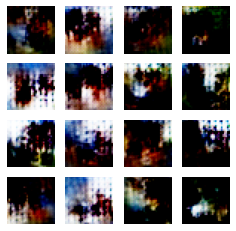

Time for training : 1064 sec


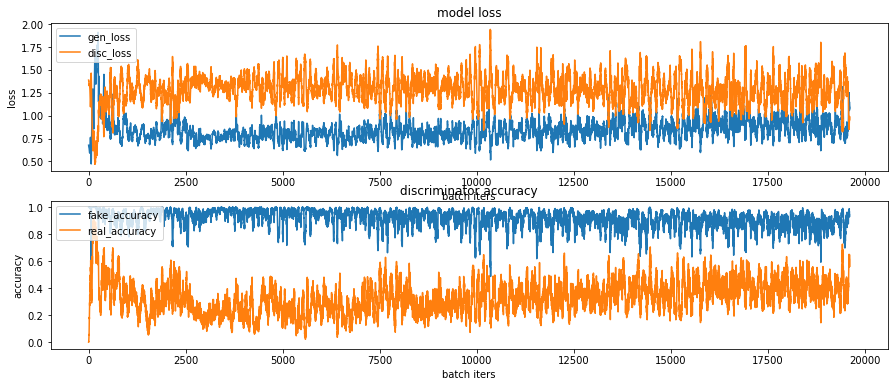

CPU times: user 18min 39s, sys: 2min 43s, total: 21min 23s
Wall time: 17min 46s


In [48]:
%%time
train(train_dataset, EPOCHS, save_every)

이미지 생성 과정을 살펴보면 아래와 같이 나옵니다. 하지만 아직 특정한 물체를 알아볼 수 있는 수준이 아닌 것 같습니다.

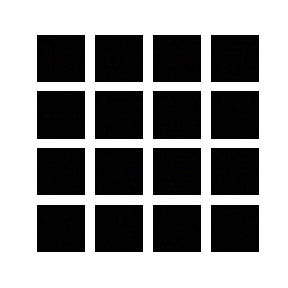

In [54]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/cifar_10_dcgan_01.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/cifar10/generated_samples/01/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/cifar_10_dcgan_01.gif

-rw-r--r-- 1 root root 1263900 Dec 19 12:32 /aiffel/aiffel/dcgan_newimage/cifar10/cifar_10_dcgan_01.gif


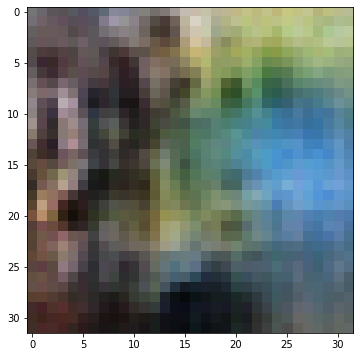

In [58]:
# 로드한 모델로 이미지 생성 재확인
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints/01'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

# 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 봅니다. 
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

np_generated = generated_image.numpy()
np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
np_generated = np_generated.astype(int)
plt.imshow(np_generated[0])
plt.show()  # 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것입니다.

## STEP 7. (optional) GAN 훈련 과정 개선하기

아쉽게도 최종 이미지를 통해 이미지가 어떤 것을 나타내는지 분간하기 힘들고, loss나 accuracy가 초기 대비 개선되는 것도 뚜렷이 보이지는 않습니다. 다양한 이미지를 통해 생성하기 때문에 이미지가 섞여 뚜렷한 이미지가 나타나지 않는 것일지 몰라 한가지 레이블로 이미지를 생성해 보도록 하겠습니다.

In [70]:
import pandas as pd

In [68]:
def load_data(label=None):
    (train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()
    if label:
        df = pd.DataFrame(list(zip(train_x, train_y)), columns=['image', 'label']) 
        df = df[df['label']==label]
        train_x = np.array([i for i in list(df['image'])])
        df = pd.DataFrame(list(zip(test_x, test_y)), columns =['image', 'label']) 
        df = df[df['label']==label]
        test_x = np.array([i for i in list(df['image'])])
    return train_x, test_x

In [76]:
train_x_1, test_x_1 = load_data(label=1)

In [77]:
train_x_1 = (train_x - 127.5) / 127.5

In [78]:
train_x_1.shape

(5000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

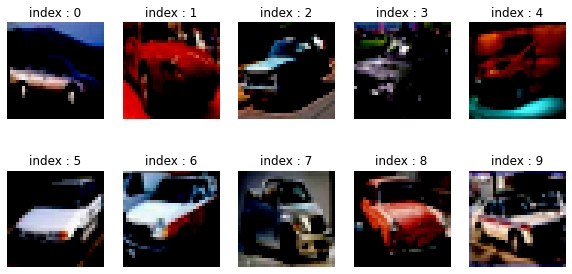

In [79]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x_1[i])
    plt.title(f"index : {i}")
    plt.axis('off')
plt.show()

In [80]:
# make a dataset from a numpy array
train_dataset = tf.data.Dataset.from_tensor_slices(train_x_1).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [81]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

In [ ]:
generator2 = make_generator_model()

In [ ]:
discriminator2 = make_discriminator_model()

In [98]:
@tf.function
def train_step2(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator2(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator2(images, training=True)
        fake_output = discriminator2(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator2.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator2.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator2.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator2.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

In [92]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i])
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/generated_samples/02/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

In [93]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/training_history/02/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

In [94]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints/02'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator2,
                                 discriminator=discriminator2)

In [99]:
def train_2nd(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step2(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator2, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator2, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

In [102]:
save_every = 5
EPOCHS = 100

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

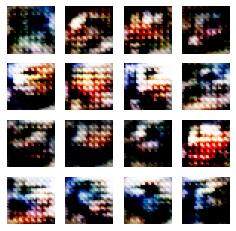

Time for training : 230 sec


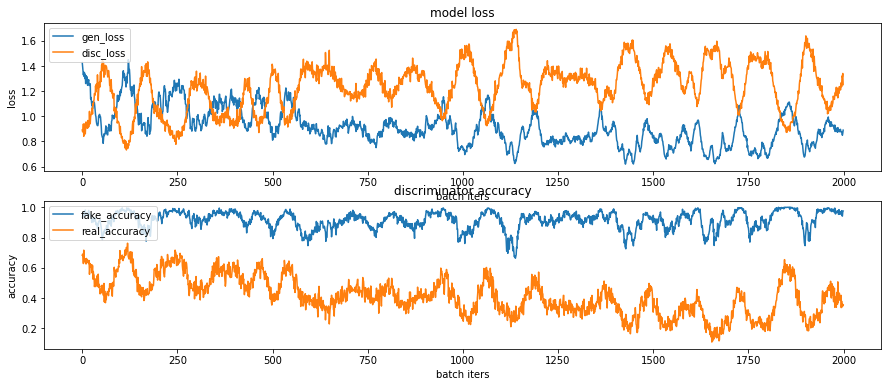

CPU times: user 4min 20s, sys: 56.2 s, total: 5min 17s
Wall time: 3min 51s


In [103]:
%%time
train_2nd(train_dataset, EPOCHS, save_every)

In [104]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/cifar_10_dcgan_02.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/cifar10/generated_samples/02/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/cifar_10_dcgan_02.gif

-rw-r--r-- 1 root root 568111 Dec 19 13:25 /aiffel/aiffel/dcgan_newimage/cifar10/cifar_10_dcgan_02.gif


아쉽지만 단일모델 (index = 1, 자동차)로 100 epoch를 돌려보았으나 최종 이미지에서 자동차를 찾아보기에는 아직 어려움이 있는 것 같습니다.

generator 모델을 ReLU와 Tanh로 변경해 보겠습니다.
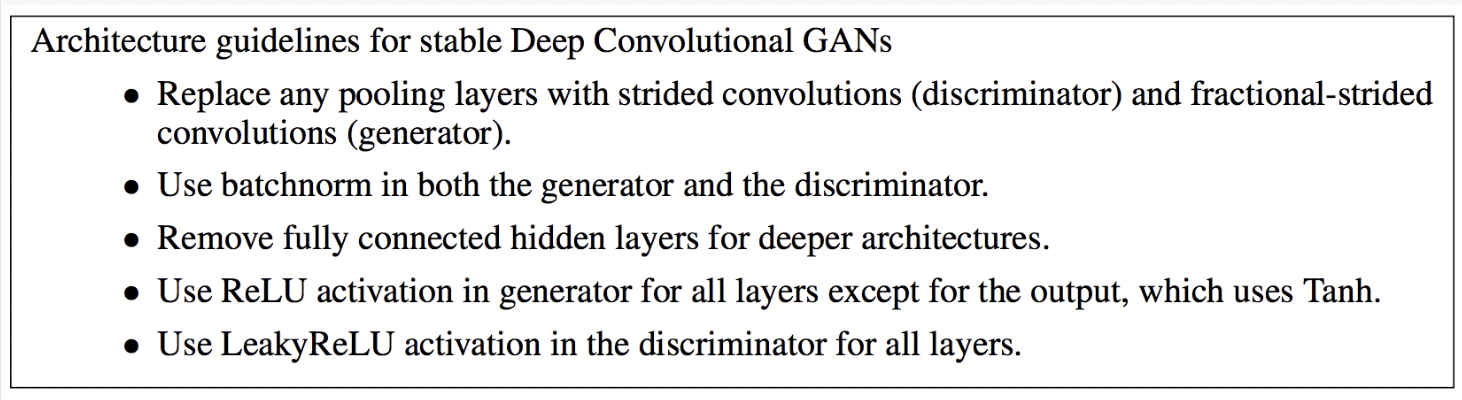

In [125]:
def make_generator_model3():
    
    # Start
    model = tf.keras.Sequential()
    
    # First : Dense Layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,))) # input_shape 형태 규정 방법 확인
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    # Second : Reshape Layer
    model.add(layers.Reshape((8, 8, 256)))
    
    # Third : Conv2DTranspose Layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    # Fourth : Conv2DTranspose Layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(3,3), strides=(2,2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    # Fifth : Conv2DTranspose Layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(3,3), strides=(2, 2), padding='same', use_bias=False \
                                    , activation='tanh'))
    return model

In [126]:
generator3 = make_generator_model3()
discriminator3 = make_discriminator_model()

In [127]:
@tf.function
def train_step3(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator3(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator3(images, training=True)
        fake_output = discriminator3(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator3.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator3.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator3.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator3.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

In [128]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history_3(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    plt.show()

In [129]:
def generate_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i])
        plt.axis('off')

    plt.show()

In [130]:
def train_3rd(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step3(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_images(generator3, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_images(generator3, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history_3(history, epoch)

In [131]:
save_every = 5
EPOCHS = 50

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

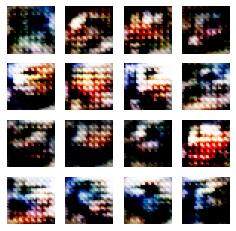

Time for training : 115 sec


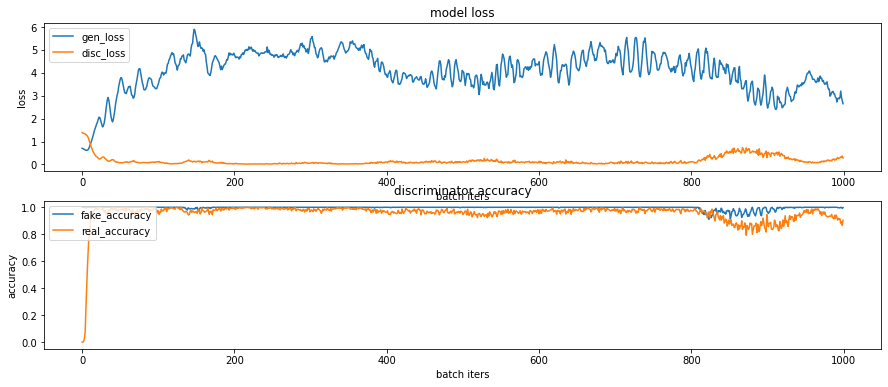

CPU times: user 2min 10s, sys: 28.7 s, total: 2min 38s
Wall time: 1min 55s


In [132]:
%%time
train_2nd(train_dataset, EPOCHS, save_every)

In [194]:
def make_generator_model4():
    
    # Start
    model = tf.keras.Sequential()
    
    # 1st : Dense Layer
    model.add(layers.Dense(4*4*256, use_bias=False, input_shape=(100,))) # input_shape 형태 규정 방법 확인
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # 2nd : Reshape Layer
    model.add(layers.Reshape((4, 4, 256)))    
        
    # 3rd : Conv2DTranspose Layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # 4th : Conv2DTranspose Layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # 5th : Conv2DTranspose Layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5,5), strides=(2,2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # 6th : Conv2DTranspose Layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(3,3), strides=(2, 2), padding='same', use_bias=False \
                                    , activation='tanh'))
    return model

In [195]:
def make_discriminator_model4():

    # Start
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=[32, 32, 3]))
    
    model.add(layers.GaussianNoise(0.2))

    # 1st: Conv2D Layer
    model.add(layers.Conv2D(96, (3, 3), strides=(1, 1), padding='same'))
    model.add(layers.Conv2D(96, (3, 3), strides=(1, 1), padding='same'))
    model.add(layers.Conv2D(96, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # 2nd: Conv2D Layer
    model.add(layers.Conv2D(192, (3, 3), strides=(1, 1), padding='same'))
    model.add(layers.Conv2D(192, (3, 3), strides=(1, 1), padding='same'))
    model.add(layers.Conv2D(192, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # 3rd: Flatten Layer
#     model.add(layers.Conv2D(192, (3, 3), strides=(1, 1), padding='same'))
#     model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(3))

    return model

In [196]:
generator4 = make_generator_model4()
discriminator4 = make_discriminator_model4()

In [197]:
generator4.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 4096)              409600    
_________________________________________________________________
batch_normalization_71 (Batc (None, 4096)              16384     
_________________________________________________________________
leaky_re_lu_43 (LeakyReLU)   (None, 4096)              0         
_________________________________________________________________
reshape_20 (Reshape)         (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose_70 (Conv2DT (None, 4, 4, 128)         819200    
_________________________________________________________________
batch_normalization_72 (Batc (None, 4, 4, 128)         512       
_________________________________________________________________
leaky_re_lu_44 (LeakyReLU)   (None, 4, 4, 128)       

In [198]:
discriminator4.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_9 (GaussianNo (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
leaky_re_lu_47 (LeakyReLU)   (None, 16, 16, 96)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 16, 16, 192)     

In [199]:
@tf.function
def train_step_new(images, generator, discriminator):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

In [200]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history_new(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    plt.show()

In [201]:
def generate_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i])
        plt.axis('off')

    plt.show()

In [202]:
def train_new(dataset, epochs, save_every, generator, discriminator):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step_new(image_batch, generator, discriminator)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history_new(history, epoch)

In [203]:
save_every = 5
EPOCHS = 500

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

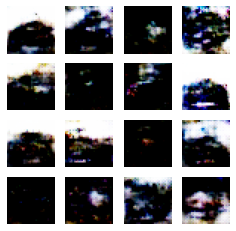

Time for training : 3218 sec


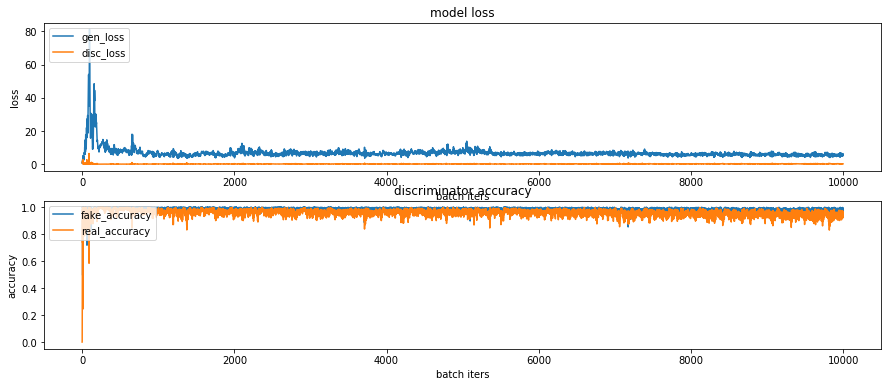

CPU times: user 55min 51s, sys: 4min 33s, total: 1h 24s
Wall time: 53min 39s


In [204]:
%%time
train_new(train_dataset, EPOCHS, save_every, generator4, discriminator4)

## 회고  
- accuracy를 구할 때 판별결과를 0.5값을 기준으로 나누어서 측정하였는데, 0.5가 의미하는 것이 무엇인지 좀 더 고민해볼 필요가 있겠습니다.
- 모델 개선을 위해 아래 언급된 논문의 내용을 참고하여 generator와 discriminator의 layer을 추가로 수정 보완하여 모델을 돌려 보았으나, 단순 모델 깊이만 변경한 값으로는 좋은 결과가 도출되지 않았습니다. 추가적인 개선을 위해서는 모델에 대한 이해도를 좀 더 많이 높일 필요가 있을 것 같습니다. 


[참고]  
- https://meissa.tistory.com/50
- GAN,DCGAN,WGAN,CGAN: https://velog.io/@tobigs-gm1/basicofgan
- Binary CrossEntropy : https://blog.naver.com/PostView.nhn?blogId=intelliz&logNo=221707985006&parentCategoryNo=&categoryNo=16&viewDate=&isShowPopularPosts=true&from=search
- 모델 개선  
    https://proceedings.neurips.cc/paper/2016/file/8a3363abe792db2d8761d6403605aeb7-Paper.pdf